# Abgabe 1

### Gruppe 3
 - Svetlana Marchenko Matrikel NR 20236284
 - Rachid En Nasiry   Matrikel NR 20240192

## Daten 
In der Übung arbeiten Sie mit dem *data_customer_shopping* Datensatz. Dieser umfasst 1286 Beobachtungen zu den Verkaufspreisen von Häusern in Windsor, Kanada. Die Daten sind in der Datei `data_customer_shopping.csv` abgelegt.
Spalten:
- Kunden-ID: Eine einzigartige Kennung, die jedem Kunden zugewiesen wird, um sein Einkaufsverhalten über die Zeit hinweg zu verfolgen und zu analysieren.
## Variablen
- `Alter`: Das Alter des Kunden, liefert demografische Informationen für Segmentierung und gezielte Marketingstrategien.

- `Geschlecht`: Die Geschlechtsidentifikation des Kunden, eine wichtige demografische Variable, die Produktpräferenzen und Kaufmuster beeinflusst.

- `Gekaufter Artikel`: Das vom Kunden ausgewählte spezifische Produkt oder der Artikel während der Transaktion.

- `Kategorie`: Die breite Klassifikation oder Gruppe, zu der der gekaufte Artikel gehört (z.B. Kleidung, Elektronik, Lebensmittel).

- `Kaufbetrag (USD)`: Der monetäre Wert der Transaktion, angegeben in US-Dollar (USD), zeigt die Kosten der gekauften Artikel an.

- `Standort`: Der geografische Ort des Kaufs, bietet Einblicke in regionale Vorlieben und Markttrends.

- `Größe`: Die Größenangabe (falls zutreffend) des gekauften Artikels, relevant für Bekleidung, Schuhe und bestimmte Verbrauchsgüter.

- `Farbe`: Die Farbvariante oder -auswahl des gekauften Artikels, beeinflusst Kundenpräferenzen und Produktverfügbarkeit.

- `Saison`: Die saisonale Relevanz des gekauften Artikels (z.B. Frühling, Sommer, Herbst, Winter), wirkt sich auf Bestandsmanagement und Marketingstrategien aus.

- `Bewertung`: Eine numerische oder qualitative Beurteilung des Kunden bezüglich seiner Zufriedenheit mit dem gekauften Artikel.

- `Abonnementstatus`: Zeigt an, ob sich der Kunde für einen Abonnementdienst entschieden hat, gibt Einblicke in seine Treue und das Potenzial für wiederkehrende Einnahmen.

- `Versandart`: Gibt die Methode an, die zur Lieferung des gekauften Artikels verwendet wurde (z.B. Standardversand, Expresslieferung), beeinflusst Lieferzeiten und -kosten.

- `Angewandter Rabatt`: Zeigt an, ob ein Werberabatt auf den Kauf angewendet wurde, beleuchtet Preisempfindlichkeit und Promotion-Effektivität.

- `Verwendeter Promo-Code`: Notiert, ob ein Werbecode oder Gutschein während der Transaktion genutzt wurde, hilft beim Bewerten des Erfolgs von Marketingkampagnen.

- `Frühere Käufe`: Stellt Informationen über die Anzahl oder Häufigkeit früherer Käufe des Kunden zur Verfügung, trägt zur Kundensegmentierung und -bindung bei.

- `Zahlungsmethode`: Gibt die vom Kunden verwendete Zahlungsart an (z.B. Kreditkarte, Bargeld), bietet Einblicke in bevorzugte Zahlungsoptionen.

- `Kaufhäufigkeit`: Zeigt an, wie oft der Kunde Kaufaktivitäten tätigt, ein wichtiger Indikator zur Bewertung von Kundenloyalität und Lebenszeitwert.


## 1. Fragestellung entwicklen und Daten aufbereiten 

### Fragestellung

In welchen Jahreszeiten zeigen Frauen bevorzugtes Kaufverhalten hinsichtlich bestimmter Produktkategorien? Wie unterscheidet sich das Verhalten von Frauen im Vergleich zu dem der Männer in derselben Altersgruppe?

### Hypothese:

Frauen zeigen möglicherweise in verschiedenen Jahreszeiten unterschiedliche Präferenzen für bestimmte Produktkategorien. Es wird angenommen, dass Frauen während der kälteren Jahreszeiten vermehrt Bekleidung kaufen, während in den wärmeren Jahreszeiten eine höhere Nachfrage nach Outdoor-Produkten besteht. In Bezug auf das Vergleichsverhalten zwischen Frauen und Männern in derselben Altersgruppe könnte man vermuten, dass Frauen tendenziell häufiger und/oder mehr Geld für bestimmte Produktkategorien ausgeben als Männer derselben Altersgruppe.'

#### Laden der Daten

Die folgende Schritte werden durchgeführt um die Daten zu laden und kontrolieren ob die Dimension des Datensatzes ist korrekt
- Datensatz wird kopiert und  kontroliert ob die Dimension des Datensatzes ist korrekt

In [3]:
# Laden der notwendigen Bibliotheken
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns   # https://seaborn.pydata.org

# Make sure the plots are displayed inline (within the notebook)
%matplotlib inline
import numpy as np

FILENAME_DATASET = "../../data/data_customers_shopping.csv"

In [325]:
#Pfad zur csv-Datei

FILENAME_DATASET = ".../data_customers_shopping.csv"

In [4]:
#Datensatz wird kopiert und  kontroliert ob die Dimension des Datensatzes ist korrekt
df = pd.read_csv(FILENAME_DATASET,
                 sep=',',
                 encoding='utf-8',
                 header=0)
df_Copy = df
nSpalten = df_Copy.shape[1]
nZeilen = df_Copy.shape[0]
if nSpalten == 18 and nZeilen == 1286:
    print(
       f"Der Datensatz hat  Zeilen {nZeilen} und {nSpalten} Spalten. Die Dimension des Datensatzes ist korrekt.")
else:
    print("Fehler: Der Datensatz hat nicht die erwartete Dimension")
#df_Copy.head()


Der Datensatz hat  Zeilen 1286 und 18 Spalten. Die Dimension des Datensatzes ist korrekt.


#### Ergänzen und Manipulieren der Daten

Überprüfung und Bereinigung des Datensatzes

Die folgenden Schritte werden durchgeführt, um die Daten zu bereinigen und eine neue Variable basierend auf dem Einkaufsverhalten zu erstellen, die für weitere Analysezwecke nützlich sein kann:

   - Zeigen eine Zusammenfassung der Informationen über den Data Frame an, einschließlich der Anzahl der Nicht-Null-Einträge und der Datentypen der Spalten.
   - Ersetzen alle Werte in Spalte 'CustomerID' durch 'anonym' - da die IDs sind nicht relevant für unsere Analyse
   - Wandelen alle numerischen Werte in absolute Zahlen um.
   - Zählen die Anzahl der fehlenden Werte in jeder Spalte des Data Frames.
   - Zeigen der deskriptiven Statistiken um zu sehen ob mean und median Werte für 'PurchaseAmountUSD' unterscheiden sich stark und wie hoch ist max Wert um zu entscheiden nach welche Strategie die NaN Values für Variable PurchaseAmountUSD zu imputieren 
   - Mean Strategie ist augewält für die NaN für die Variable PurchaseAmountUSD. Die Values sind imputed
   - Zeihgen die Values für Variable 'Location' - 50 unique Values sind gezeigt und 1 NaN. 
   - Unsere Vermutung lautet, dass der fehlende Wert für die Variable 'Location' "District of Columbia" ist. Dies basiert darauf, dass alle 50 Bundesstaaten der USA im Datensatz vertreten sind, aber nicht der "District of Columbia". Es ist möglich, dass dieser fehlt, da in der Umfrage der Distrikt nicht als eigenständiger Staat aufgeführt werden konnte.    
   - Erstellen Sie eine neue Variable "PurchasePerYear", indem Sie die Zeichenfolgenwerte der Variable "FrequencyofPurchases" in numerische Werte umwandeln und sie in der Variablen "PurchasePerYear" speichern.
   


In [5]:
#Zeigt eine Zusammenfassung der Informationen über den Data Frame an, einschließlich Anzahl der Nicht-Null-Einträge und Datentypen der Spalten
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1281 non-null   float64
 1   Age                   1286 non-null   int64  
 2   Gender                1286 non-null   object 
 3   ItemPurchased         1286 non-null   object 
 4   Category              1286 non-null   object 
 5   PurchaseAmountUSD     1281 non-null   float64
 6   Location              1279 non-null   object 
 7   Size                  1286 non-null   object 
 8   Color                 1286 non-null   object 
 9   Season                1286 non-null   object 
 10  ReviewRating          1286 non-null   float64
 11  SubscriptionStatus    1286 non-null   object 
 12  ShippingType          1286 non-null   object 
 13  DiscountApplied       1286 non-null   object 
 14  PromoCodeUsed         1286 non-null   object 
 15  PreviousPurchases    

In [6]:
# Ersetze alle Werte in Spalte 'CustomerID' durch 'anonym'
df_Copy ['CustomerID'] = 'anonym'
df_Copy ['CustomerID'].head()

0    anonym
1    anonym
2    anonym
3    anonym
4    anonym
Name: CustomerID, dtype: object

In [7]:
#Alle numerischen Werte werden in absolute Zahlen umgewandelt
df_Copy[[ 'Age','PurchaseAmountUSD' ,'ReviewRating' ]]=df[['Age','PurchaseAmountUSD', 'ReviewRating']].abs()

In [8]:
# Zähle die Anzahl der fehlenden Werte in jeder Spalte des DataFrames
df_Copy.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
ItemPurchased           0
Category                0
PurchaseAmountUSD       5
Location                7
Size                    0
Color                   0
Season                  0
ReviewRating            0
SubscriptionStatus      0
ShippingType            0
DiscountApplied         0
PromoCodeUsed           0
PreviousPurchases       0
PaymentMethod           0
FrequencyofPurchases    0
dtype: int64

In [9]:
#Filtern des DataFrames nach fehlenden Werten in 'PurchaseAmountUSD' oder 'Location'
missing_values_subset = df_Copy[df_Copy['PurchaseAmountUSD'].isnull() | df['Location'].isnull()]

# Display the filtered DataFrame
print(missing_values_subset)


     CustomerID  Age  Gender ItemPurchased     Category  PurchaseAmountUSD  \
103      anonym   37    Male       Sweater     Clothing                NaN   
216      anonym   64    Male    Sunglasses  Accessories               27.0   
313      anonym   48    Male    Sunglasses  Accessories                NaN   
348      anonym   37    Male       Sweater     Clothing               59.0   
364      anonym   31    Male         Jeans     Clothing                NaN   
501      anonym   59    Male          Coat    Outerwear               21.0   
543      anonym   51    Male       Handbag  Accessories               40.0   
694      anonym   56    Male       Jewelry  Accessories               88.0   
779      anonym   22    Male        Jacket    Outerwear                NaN   
902      anonym   49  Female       Sweater     Clothing               30.0   
952      anonym   34  Female         Jeans     Clothing               87.0   
1116     anonym   27  Female       T-shirt     Clothing         

In [10]:
# Filtern des DataFrames nach 'ItemPurchased' mit dem Wert 'Sunglasses' und 'Gender'  
sunglasses_df = df_Copy[df_Copy['ItemPurchased'] == 'Sunglasses']
sunglasses_df_m = df_Copy[(df_Copy['ItemPurchased'] == 'Sunglasses') & (df_Copy['Gender']=='Male')]
sunglasses_df_f = df_Copy[(df_Copy['ItemPurchased'] == 'Sunglasses') & (df_Copy['Gender']=='Female')]
durchschnitt = sunglasses_df['PurchaseAmountUSD'].mean()
mittelwert = sunglasses_df['PurchaseAmountUSD'].median()
durchschnitt_m = sunglasses_df_m['PurchaseAmountUSD'].mean()
mittelwert_m = sunglasses_df_m['PurchaseAmountUSD'].median()
durchschnitt_f = sunglasses_df_f['PurchaseAmountUSD'].mean()
mittelwert_f = sunglasses_df_f['PurchaseAmountUSD'].median()
max_purchase_amount = sunglasses_df['PurchaseAmountUSD'].max()

# Ausgabe der deskriptiven Statistiken um zu sehen ob mean und median Werte für Sunglasses unterscheiden sich stark und wie hoch ist max Wert um zu entscheiden nach welche Strategie die Nan in Variable PurchaseAmountUSD zu imputeren
print("Durchschnittlicher Kaufbetrag für Sonnenbrillen:", durchschnitt, durchschnitt_m, durchschnitt_f)
print("Mittlerer Kaufbetrag für Sonnenbrillen:", mittelwert, mittelwert_m, mittelwert_f)
print("Mittlerer Kaufbetrag für Sonnenbrillen:", max_purchase_amount)

Durchschnittlicher Kaufbetrag für Sonnenbrillen: 64.0 65.82051282051282 60.26315789473684
Mittlerer Kaufbetrag für Sonnenbrillen: 66.5 69.0 58.0
Mittlerer Kaufbetrag für Sonnenbrillen: 174.0


In [13]:
from sklearn.impute import SimpleImputer

# Define the variables to impute
VARIABLES_TO_IMPUTE = ["PurchaseAmountUSD"]

# Define filtering conditions for different subsets
filter_conditions = [
    (df_Copy['Gender'] == 'Male') & (df_Copy['ItemPurchased'] == 'Sunglasses'),
    (df_Copy['Gender'] == 'Male') & (df_Copy['ItemPurchased'] == 'Sweater'),
    (df_Copy['Gender'] == 'Male') & (df_Copy['ItemPurchased'] == 'Jeans'),
    (df_Copy['Gender'] == 'Male') & (df_Copy['ItemPurchased'] == 'Jacket'),
    (df_Copy['Gender'] == 'Female') & (df_Copy['ItemPurchased'] == 'T-shirt')
]



# Filter the DataFrame and apply imputation for each condition
for condition in filter_conditions:
    filtered_df = df_Copy[condition]
    mean_imputer = SimpleImputer(strategy='mean')
    for variable in VARIABLES_TO_IMPUTE:
        result_mean_imputer = mean_imputer.fit_transform(
            filtered_df[variable].values.reshape(-1, 1)
        )
        result_mean_imputer_rounded = np.round(result_mean_imputer)
        df_imputed = pd.DataFrame(result_mean_imputer_rounded, columns=[variable], index=filtered_df.index)
        df_Copy.loc[filtered_df.index, variable] = df_imputed[variable].values
        
selected_dataPurchaseAmountImputed = df_Copy[VARIABLES_TO_IMPUTE]
#print(selected_data)

# Display the selected data
selected_dataPurchaseAmountImputed.to_csv('selected_dataPurchaseAmountImputed.csv', index=False)


In [14]:

unique_values_location = df_Copy['Location'].unique()
print(unique_values_location)





['Kentucky' 'Maine' 'Wyoming' 'Montana' 'Louisiana' 'Missouri' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Rhode Island' 'Mississippi'
 'North Carolina' 'Oklahoma' 'Texas' 'Arizona' 'Maryland' 'Vermont'
 'Alaska' 'New Mexico' 'South Carolina' 'West Virginia' 'New Jersey'
 'Virginia' 'Indiana' 'Utah' 'California' 'Alabama' 'Florida'
 'South Dakota' 'Washington' 'Kansas' 'Colorado' 'Connecticut'
 'North Dakota' 'Idaho' 'Nebraska' 'Pennsylvania' 'Wisconsin' 'Minnesota'
 'Nevada' 'Arkansas' 'Tennessee' 'Iowa' 'Oregon' 'Georgia' 'Massachusetts'
 'Michigan' 'Illinois' nan 'Ohio']


In [17]:
# Replace NaN values in the "Location" column with "District of Columbia"
df_Copy['Location'] = df_Copy['Location'].fillna('District of Columbia')
unique_values_location = df_Copy['Location'].unique()
print(unique_values_location)

df_Copy.isnull().sum()


['Kentucky' 'Maine' 'Wyoming' 'Montana' 'Louisiana' 'Missouri' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Rhode Island' 'Mississippi'
 'North Carolina' 'Oklahoma' 'Texas' 'Arizona' 'Maryland' 'Vermont'
 'Alaska' 'New Mexico' 'South Carolina' 'West Virginia' 'New Jersey'
 'Virginia' 'Indiana' 'Utah' 'California' 'Alabama' 'Florida'
 'South Dakota' 'Washington' 'Kansas' 'Colorado' 'Connecticut'
 'North Dakota' 'Idaho' 'Nebraska' 'Pennsylvania' 'Wisconsin' 'Minnesota'
 'Nevada' 'Arkansas' 'Tennessee' 'Iowa' 'Oregon' 'Georgia' 'Massachusetts'
 'Michigan' 'Illinois' 'District of Columbia' 'Ohio']


CustomerID              0
Age                     0
Gender                  0
ItemPurchased           0
Category                0
PurchaseAmountUSD       0
Location                0
Size                    0
Color                   0
Season                  0
ReviewRating            0
SubscriptionStatus      0
ShippingType            0
DiscountApplied         0
PromoCodeUsed           0
PreviousPurchases       0
PaymentMethod           0
FrequencyofPurchases    0
dtype: int64

In [16]:
# 
unique_values = df_Copy['FrequencyofPurchases'].unique()
print(unique_values)


['Fortnightly' 'Weekly' 'Quarterly' 'Monthly' 'Annually' 'Every 3 Months'
 'Bi-Weekly']


In [18]:
# Erstellen dictionary mapping das jeder Häufigkeit ihre entsprechenden Käufe pro Jahr zuordnet
frequency_mapping = {
    'Fortnightly': 26,
    'Weekly': 52,
    'Quarterly': 4,
    'Monthly': 12,
    'Annually': 1,
    'Every 3 Months': 4,
    'Bi-Weekly': 104  # Assuming Bi-Weekly means two time a week 
}
# Die Werte in der Spalte "FrequencyofPurchase" sollen den entsprechenden Käufen pro Jahr (nummerische Values)zugeordnet werden.
df_Copy['PurchasePerYear'] = df_Copy['FrequencyofPurchases'].map(frequency_mapping)
print(df_Copy)
df_Copy.head()

     CustomerID  Age  Gender ItemPurchased     Category  PurchaseAmountUSD  \
0        anonym   55    Male        Blouse     Clothing               53.0   
1        anonym   19    Male       Sweater     Clothing               64.0   
2        anonym   46    Male      Sneakers     Footwear               20.0   
3        anonym   63    Male         Shirt     Clothing               85.0   
4        anonym   27    Male        Shorts     Clothing               34.0   
...         ...  ...     ...           ...          ...                ...   
1281     anonym   42  Female         Shirt     Clothing               20.0   
1282     anonym   56  Female         Scarf  Accessories               25.0   
1283     anonym   40  Female         Shirt     Clothing               34.0   
1284     anonym   36  Female         Dress     Clothing               30.0   
1285     anonym   66  Female         Skirt     Clothing               78.0   

           Location Size     Color  Season  ReviewRating Subscr

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases,PurchasePerYear
0,anonym,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,26
1,anonym,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,26
2,anonym,46,Male,Sneakers,Footwear,20.0,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,52
3,anonym,63,Male,Shirt,Clothing,85.0,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,4
4,anonym,27,Male,Shorts,Clothing,34.0,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,52


### Deskriptive Statistiken und Visualisierung 

Die folgenden Schritte werden durchgeführt, um die Daten zu bereinigen und eine neue Variable basierend auf dem Einkaufsverhalten zu erstellen, die für weitere Analysezwecke nützlich sein kann:
- Zeigen deskriptive Statistik für alle Spalten des DataFrame
- Kategorisieren Individuen basierend auf ihren Alterswerten in verschiedene Altersgruppen. Sie zielt darauf ab, sinnvolle Altersklassen für statistische Analysen oder andere Zwecke zu erstellen. Bemerkenswert ist, dass junge Erwachsene im Alter von 18-21 Jahren nicht in eine spezielle Gruppe eingeteilt werden, da es keine Artikel im Datensatz gibt, die den Kauf unter 21 Jahren einschränken(USA).
- Definiere die Altersgruppen als folgendes 18-35 'young adults', 35-65 'middle age', 65+ 'late adulthood'

- Zeigen wie unterscheidet sich die Anzahl von Personen in Altersgruppen
- Wir entscheden weiter nur mit die Statistiken für Frauen/Männer von 35-65 j.A zu arbeiten,  da die sind die Gruppen wo wir am meisten die Data haben  

In [20]:
#deskriptive Statistik für alle Spalten des DataFrame "df_Copy" aus und rundet die Ergebnisse auf zwei Dezimalstellen.
df_Copy.describe(include="all").round(2)

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases,PurchasePerYear,Age_Group
count,1286,1286.00,1286,1286,1286,1286.00,1286,1286,1286,1286,1286.00,1286,1286,1286,1286,1286.00,1286,1286,1286.00,1286
unique,1,NaN,2,25,4,NaN,51,4,25,4,NaN,2,6,2,2,NaN,6,7,NaN,3
top,anonym,NaN,Male,Pants,Clothing,NaN,Alabama,M,Teal,Spring,NaN,No,Free Shipping,No,No,NaN,Cash,Every 3 Months,NaN,middle age
freq,1286,NaN,890,62,591,NaN,34,579,68,344,NaN,947,233,736,736,NaN,232,200,NaN,755
mean,NaN,44.50,NaN,NaN,NaN,64.04,NaN,NaN,NaN,NaN,3.71,NaN,NaN,NaN,NaN,25.02,NaN,NaN,28.87,NaN
std,NaN,14.95,NaN,NaN,NaN,61.46,NaN,NaN,NaN,NaN,0.71,NaN,NaN,NaN,NaN,14.47,NaN,NaN,34.39,NaN
min,NaN,18.00,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,2.50,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,NaN
25%,NaN,32.00,NaN,NaN,NaN,38.00,NaN,NaN,NaN,NaN,3.10,NaN,NaN,NaN,NaN,13.00,NaN,NaN,4.00,NaN
50%,NaN,45.00,NaN,NaN,NaN,60.00,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,25.00,NaN,NaN,12.00,NaN
75%,NaN,57.00,NaN,NaN,NaN,80.00,NaN,NaN,NaN,NaN,4.30,NaN,NaN,NaN,NaN,38.00,NaN,NaN,52.00,NaN


In [21]:

#hier werden die kategoriale Variablen in der Spalte in das binäre (Dummy) Variable konvertiert
VARIABLES_TO_OHE = ["Category"]

pd.get_dummies(df_Copy[VARIABLES_TO_OHE])

,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear
0,False,True,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1281,False,True,False,False
1282,True,False,False,False
1283,False,True,False,False
1284,False,True,False,False


In [22]:
# Definiere die Altersgruppen
bins = [18, 35, 65, float('inf')]
labels = ['young adults', 'middle age', 'late adulthood']

# Füge eine neue Spalte mit den Altersgruppen hinzu
df_Copy['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Zeige den DataFrame mit der neuen Spalte an
df_Copy.head()

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases,PurchasePerYear,Age_Group
0,anonym,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,26,middle age
1,anonym,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,26,young adults
2,anonym,46,Male,Sneakers,Footwear,20.0,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,52,middle age
3,anonym,63,Male,Shirt,Clothing,85.0,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,4,middle age
4,anonym,27,Male,Shorts,Clothing,34.0,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,52,young adults


<Axes: xlabel='age group', ylabel='number of customers in the group'>

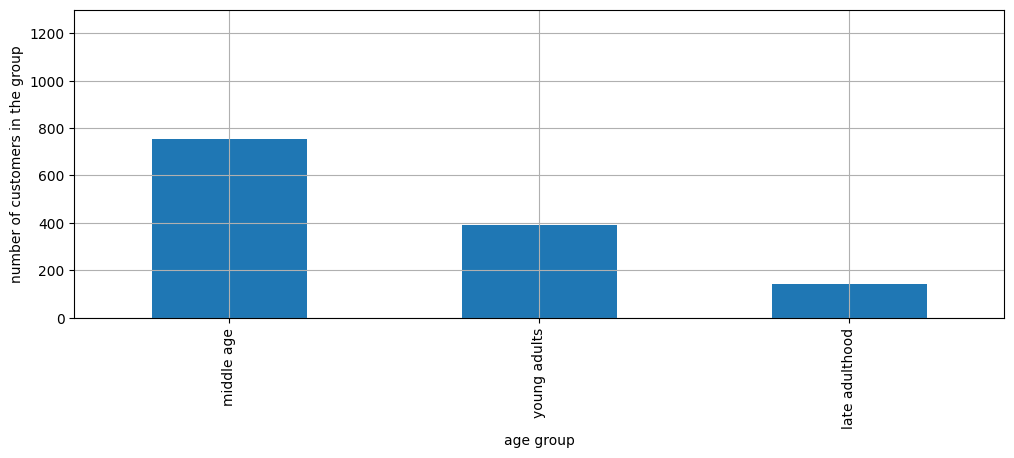

In [28]:
# Zeigen die statistiken nach altersgruppen für alle Kunden 
FIGSIZE = (12, 4)
YLABEL = "number of customers in the group"
XLABEL = "age group"
GRID = True
colors = {'Male': 'blue', 'Female': 'pink'}

df_Copy["Age_Group"].value_counts().plot.bar(
    figsize=FIGSIZE, ylabel=YLABEL, xlabel=XLABEL, ylim=(0, 1300), grid=GRID)

##### Das Diagramm zeigt, wie viele Personen im Datensatz nach Altersgruppe gruppiert sind, ohne Berücksichtigung des Geschlechts oben mit Berücksichtigung des Geschlechts

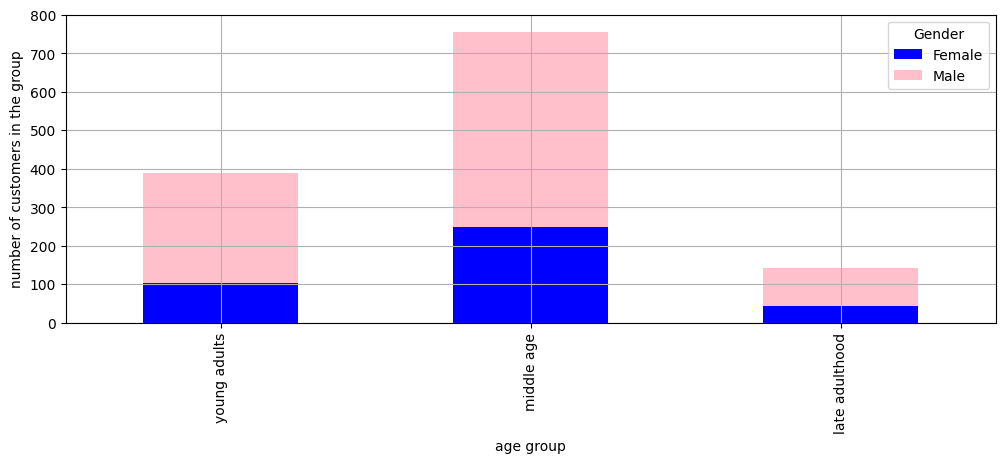

In [30]:

FIGSIZE = (12, 4)
YLABEL = "number of customers in the group"
XLABEL = "age group"
GRID = True
# Farben für Männer und Frauen Definieren
colors = {'Male': 'blue', 'Female': 'pink'}
# Group the data by 'Age_Group' and 'Gender', and count the number of individuals in each group

# die Daten nach „Age_Group“ und „Gender“ Gruppieren  und  die Anzahl der Personen in jeder Gruppe zählen 
age_gender_counts = df_Copy.groupby(['Age_Group', 'Gender'] , observed=True).size().unstack()

#Zeichnen des gestapelten Balkendiagramms mit unterschiedlichen Farben für Männer und Frauen
ax = age_gender_counts.plot.bar( stacked=True, figsize=(12, 4), color=colors.values(),  ylabel=YLABEL, xlabel=XLABEL, ylim=(0, 800), grid=GRID)





##### Das Diagramm zeigt das Kaufverhalten von Männern und Frauen. Es ist ersichtlich, dass Männer mehr ausgegeben haben als Frauen. 

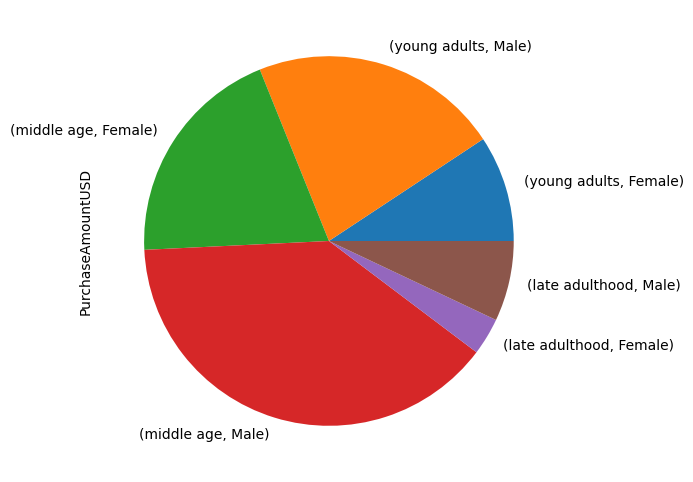

In [31]:
purcheseAmountUSD_perAgeGroup = df_Copy.groupby(['Age_Group','Gender'], observed=True )['PurchaseAmountUSD'].sum()
purchasePlot = purcheseAmountUSD_perAgeGroup.plot.pie( figsize=(6, 6))

C:\Users\sve75036\AppData\Local\Temp\ipykernel_5428\1723772739.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purcheseAmountUSD_perAgeGroup_Female_Category = df_Copy[df_Copy['Gender'] == 'Female'].groupby(['Age_Group', 'Category'])['PurchaseAmountUSD'].sum()


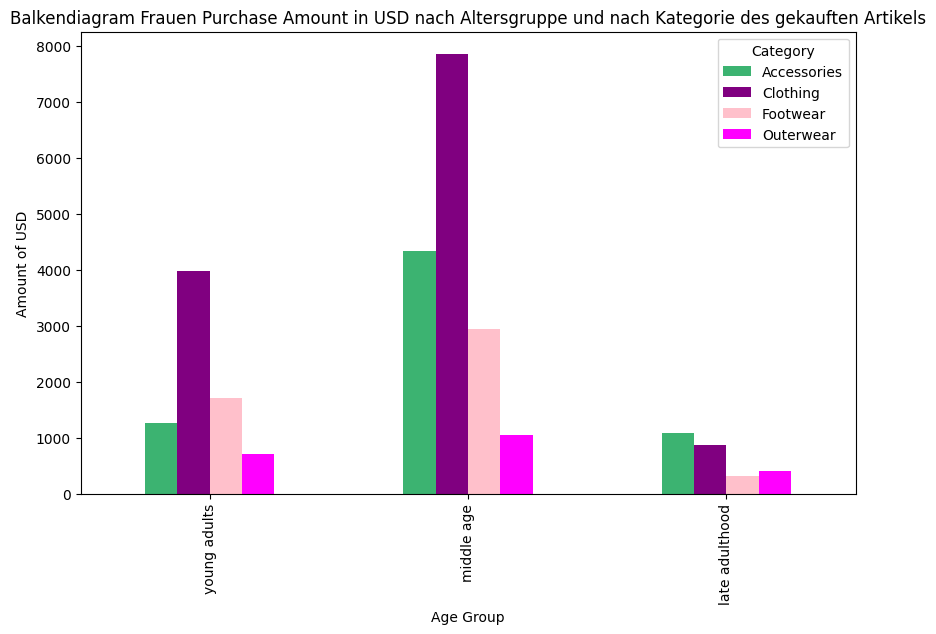

In [32]:
YLABEL = "Amount of USD"
XLABEL = "Age Group"
TITLE = "Balkendiagram Frauen Purchase Amount in USD nach Altersgruppe und nach Kategorie des gekauften Artikels"

# Define colors for each category
colors = {'Accessories': 'mediumseagreen', 'Clothing': 'purple', 'Footwear':'pink', 'Outerwear':'magenta'}

# Group by age group and category, summing the PurchaseAmountUSD for females
purcheseAmountUSD_perAgeGroup_Female_Category = df_Copy[df_Copy['Gender'] == 'Female'].groupby(['Age_Group', 'Category'])['PurchaseAmountUSD'].sum()

# Plot the bar chart
purchasePlot = purcheseAmountUSD_perAgeGroup_Female_Category.unstack().plot.bar(figsize=(10, 6), title=TITLE, xlabel=XLABEL, ylabel=YLABEL, color=[colors[category] for category in purcheseAmountUSD_perAgeGroup_Female_Category.unstack().columns])


##### Das Diagramm zeigt das Kaufverhalten von Frauen nach Altersgruppe und kategorie des gekauften Artikel.

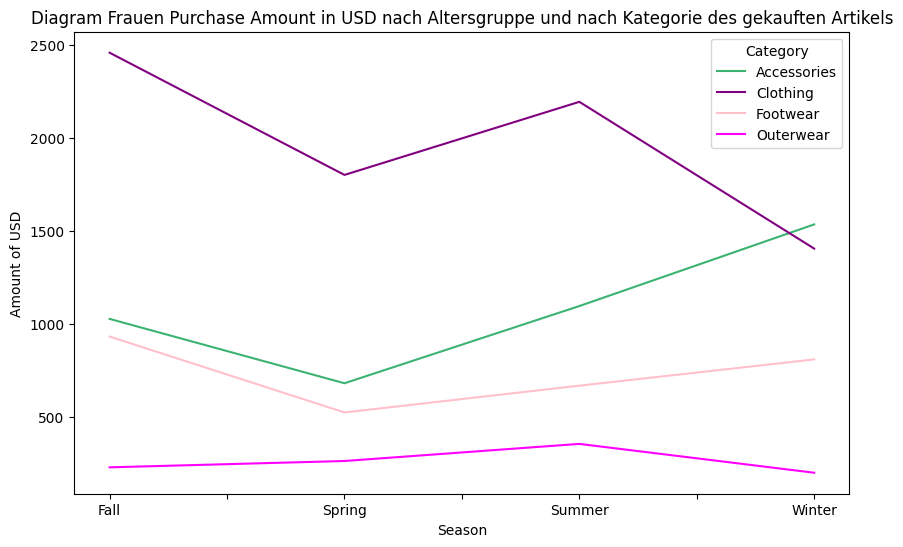

In [35]:
YLABEL = "Amount of USD"
XLABEL = "Season"
TITLE = "Diagram Frauen Purchase Amount in USD nach Altersgruppe und nach Kategorie des gekauften Artikels"

# Define colors for each category
colors = {'Accessories': 'mediumseagreen', 'Clothing': 'purple', 'Footwear':'pink', 'Outerwear':'magenta'}

# Group by age group and category, summing the PurchaseAmountUSD for females
purcheseAmountUSD_perAgeGroup_Female_Category = df_Copy[(df_Copy['Age_Group'] == 'middle age')&(df_Copy['Gender'] == 'Female')].groupby([ 'Season','Category',])['PurchaseAmountUSD'].sum()

# Plot the bar chart
purchasePlot = purcheseAmountUSD_perAgeGroup_Female_Category.unstack().plot(figsize=(10, 6), title=TITLE, xlabel=XLABEL, ylabel=YLABEL, color=[colors[category] for category in purcheseAmountUSD_perAgeGroup_Female_Category.unstack().columns])



##### Das Diasgramm zeigt das Kaufverhalten in denJahreszeiten  von Frauen in Bezug auf den Kaufbetrag nach Altergruppe und Kategorie des gekauftenArtikels 

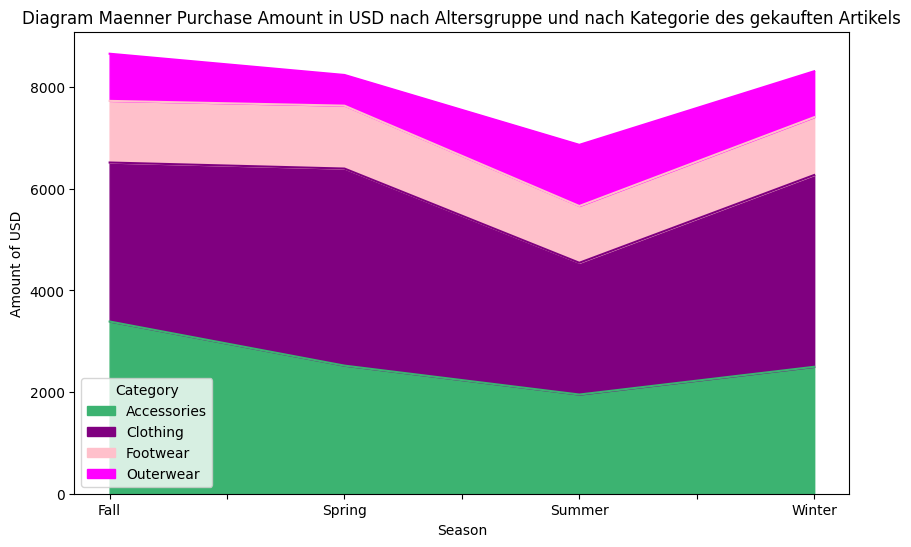

In [441]:
YLABEL = "Kaufbetrag in USD"
XLABEL = "Season"
TITLE = "Diagram Maenner Purchase Amount in USD nach Altersgruppe und nach Kategorie des gekauften Artikels"

# Define colors for each category
# Die Farben für jede Kategorie definieren

colors = {'Accessories': 'mediumseagreen', 'Clothing': 'purple', 'Footwear':'pink', 'Outerwear':'magenta'}
#Gruppierung nach Altersgruppe und Kategorie und  werden die PurchaseAmountUSD für Frauen summiert
purcheseAmountUSD_perAgeGroup_Female_Category = df_Copy[(df_Copy['Age_Group'] == 'middle age')&(df_Copy['Gender'] == 'Male')].groupby([ 'Season','Category',])['PurchaseAmountUSD'].sum()

# Zeichnung des  Balkendiagramm 
purchasePlot = purcheseAmountUSD_perAgeGroup_Female_Category.unstack().plot.area(figsize=(10, 6), title=TITLE, xlabel=XLABEL, ylabel=YLABEL, color=[colors[category] for category in purcheseAmountUSD_perAgeGroup_Female_Category.unstack().columns])



##### Das Diagramm stellt das Kaufverhalten von Männern  dar, in Bezug auf den Kaufbetrag in USD nach Altersgruppe und Kategorie des gekauften Artikels,zweck aus diesem Diagramm eine überschaubare Vergleich zwischen das Kaufverhalten zwischen Männern und Frauen .

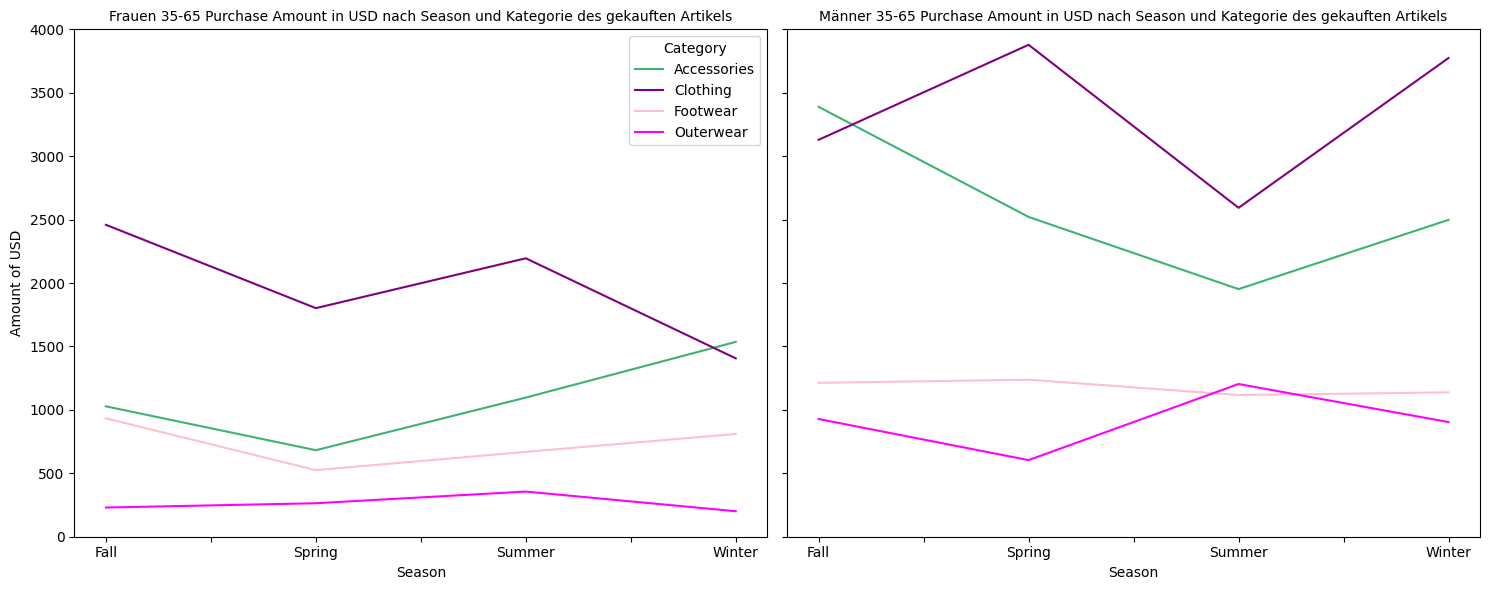

In [50]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)  # sharey=True shares the same y-axis

# Define colors for each category
colors = {'Accessories': 'mediumseagreen', 'Clothing': 'purple', 'Footwear': 'pink', 'Outerwear': 'magenta'}

# Group by age group and category, summing the PurchaseAmountUSD for females
purcheseAmountUSD_perAgeGroup_Female_Category = df_Copy[(df_Copy['Age_Group'] == 'middle age') & (df_Copy['Gender'] == 'Female')].groupby(['Season', 'Category'])['PurchaseAmountUSD'].sum()

# Plot the bar chart for female customers
purcheseAmountUSD_perAgeGroup_Female_Category.unstack().plot(ax=axes[0], title='Frauen 35-65 Purchase Amount in USD nach Season und Kategorie des gekauften Artikels', xlabel='Season', ylabel='Amount of USD', color=[colors[category] for category in purcheseAmountUSD_perAgeGroup_Female_Category.unstack().columns], legend=True, rot=0)

# Set the same y-axis limit for both plots
axes[0].set_ylim(0, 4000)
axes[1].set_ylim(0, 4000)

# Group by age group and category, summing the PurchaseAmountUSD for males
purcheseAmountUSD_perAgeGroup_Male_Category = df_Copy[(df_Copy['Age_Group'] == 'middle age') & (df_Copy['Gender'] == 'Male')].groupby(['Season', 'Category'])['PurchaseAmountUSD'].sum()

# Plot the bar chart for male customers
purcheseAmountUSD_perAgeGroup_Male_Category.unstack().plot(ax=axes[1], title='Männer 35-65 Purchase Amount in USD nach Season und Kategorie des gekauften Artikels', xlabel='Season', ylabel='Amount of USD', color=[colors[category] for category in purcheseAmountUSD_perAgeGroup_Male_Category.unstack().columns], legend=False, rot=0)
axes[0].title.set_fontsize(10)
axes[1].title.set_fontsize(10)
# Show the plots
plt.tight_layout()
plt.show()


### Fazit
Gemäß der Statistik geben Frauen in der mittleren Altersgruppe im Herbst tendenziell den höchsten Betrag für Kleidung aus. Im Winter steigt jedoch ihre Ausgabenbereitschaft deutlich für Accessoires. Diese Beobachtung legt einen möglichen Trend nahe, bei dem Frauen ihre Winterkleidung möglicherweise im Voraus kaufen, indem sie diese bereits während der Herbstsaison erwerben. Die Nachfrage nach Outderwear steigt im Frühling leicht an. Das Kaufverhalten der Männer unterscheidet sich erheblich. Der Kaufbetrag in USD ist im Frühling am höchsten, gefolgt von der Wintersaison. Bei den Frauen lässt sich ein zweiter Höhepunkt des Kaufverhaltens im Herbst und ein weiterer im Sommer feststellen. Im Gegensatz dazu steigen die Kaufsummen der Männer im Frühling und Winter an. Zusammenfassend lässt sich sagen, dass das Kaufverhalten der Kunden stark vom Geschlecht abhängt